In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
df=pd.read_csv('yds_data.csv')
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [39]:
df.shape

(30697, 28)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
Unnamed: 0               30697 non-null int64
match_event_id           29134 non-null float64
location_x               29236 non-null float64
location_y               29157 non-null float64
remaining_min            29135 non-null float64
power_of_shot            29211 non-null float64
knockout_match           29180 non-null float64
game_season              24835 non-null object
remaining_sec            29103 non-null float64
distance_of_shot         29130 non-null float64
is_goal                  24429 non-null float64
area_of_shot             29195 non-null object
shot_basics              29122 non-null object
range_of_shot            29133 non-null object
team_name                29162 non-null object
date_of_game             29147 non-null object
home/away                29200 non-null object
shot_id_number           29134 non-null float64
lat/lng                  29132 non-n

In [41]:
df.isnull().sum()/len(df) *100

Unnamed: 0                0.000000
match_event_id            5.091703
location_x                4.759423
location_y                5.016777
remaining_min             5.088445
power_of_shot             4.840864
knockout_match            4.941851
game_season              19.096329
remaining_sec             5.192690
distance_of_shot          5.104733
is_goal                  20.418933
area_of_shot              4.892986
shot_basics               5.130795
range_of_shot             5.094960
team_name                 5.000489
date_of_game              5.049353
home/away                 4.876698
shot_id_number            5.091703
lat/lng                   5.098218
type_of_shot             49.776851
type_of_combined_shot    50.223149
match_id                  0.000000
team_id                   0.000000
remaining_min.1           5.000489
power_of_shot.1           5.013519
knockout_match.1          4.863667
remaining_sec.1           5.013519
distance_of_shot.1        5.107991
dtype: float64

In [42]:
lab = [ 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'remaining_sec',
       'distance_of_shot', 'is_goal',  'shot_id_number',
       'remaining_min.1', 'power_of_shot.1', 'knockout_match.1',
       'remaining_sec.1', 'distance_of_shot.1']
for i in lab:
    df[i].fillna(df[i].median(), inplace = True)
df.isnull().sum()/len(df) *100

Unnamed: 0                0.000000
match_event_id            5.091703
location_x                0.000000
location_y                0.000000
remaining_min             0.000000
power_of_shot             0.000000
knockout_match            0.000000
game_season              19.096329
remaining_sec             0.000000
distance_of_shot          0.000000
is_goal                   0.000000
area_of_shot              4.892986
shot_basics               5.130795
range_of_shot             5.094960
team_name                 5.000489
date_of_game              5.049353
home/away                 4.876698
shot_id_number            0.000000
lat/lng                   5.098218
type_of_shot             49.776851
type_of_combined_shot    50.223149
match_id                  0.000000
team_id                   0.000000
remaining_min.1           0.000000
power_of_shot.1           0.000000
knockout_match.1          0.000000
remaining_sec.1           0.000000
distance_of_shot.1        0.000000
dtype: float64

In [43]:
print(df['team_name'].nunique())
print(df['Unnamed: 0'].nunique())
print(df['match_event_id'].nunique())

1
30697
618


## Since There Is Only One Value We Can Drop These Column

In [44]:
drop = ['team_name','Unnamed: 0']
df.drop(drop,inplace=True,axis=1)
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,0.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,6.00,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [45]:
df.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,0.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,6.00,1.0,122.608,52.0000,42.0
4,155.0,0.0,0.0,5.0,2.0,0.0,2000-01,19.0,20.0,1.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0


In [100]:
df.groupby('is_goal')['distance_of_shot'].value_counts()

is_goal  distance_of_shot
0.0      20.0                2628
         35.0                1715
         45.0                1331
         44.0                1021
         37.0                 985
         36.0                 927
         38.0                 920
         46.0                 907
         39.0                 876
         40.0                 784
         34.0                 670
         33.0                 599
         41.0                 519
         32.0                 487
         42.0                 455
         30.0                 451
         27.0                 442
         26.0                 402
         31.0                 401
         28.0                 396
         43.0                 371
         29.0                 370
         47.0                 367
         25.0                 337
         22.0                 316
         21.0                 290
         23.0                 234
         24.0                 210
         48.0         

In [113]:
df[df['is_goal']==1]['is_goal'].count()

10879

## There Are Total 10879 Goals 

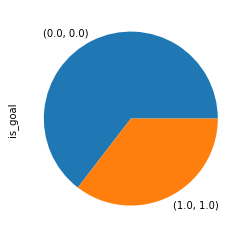

In [129]:
df.groupby('is_goal')['is_goal'].value_counts().plot.pie()

## Goal Are Save More Than Goal

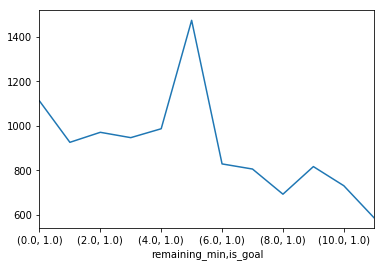

In [130]:
df[df['is_goal']==1].groupby('remaining_min')['is_goal'].value_counts().plot()

## Maximum Probality Of Have A Goal Is In When 5 Min Left In The Game

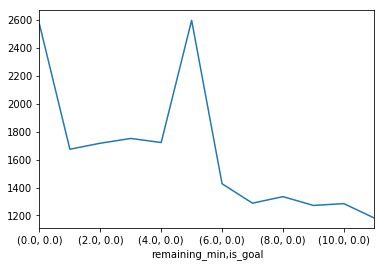

In [133]:
df[df['is_goal']==0].groupby('remaining_min')['is_goal'].value_counts().plot()

## Let's Compare Both Graph

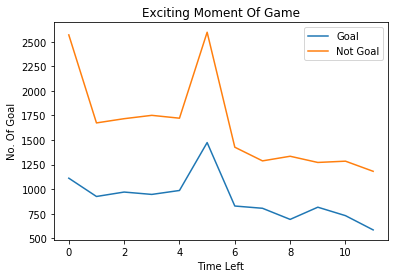

In [135]:
plt.plot(df[df['is_goal']==1].groupby('remaining_min')[['is_goal']].count(),label='Goal')
plt.plot(df[df['is_goal']==0].groupby('remaining_min')[['is_goal']].count(),label='Not Goal')
plt.xlabel('Time Left')
plt.ylabel('No. Of Goal')
plt.title('Exciting Moment Of Game')
plt.legend()

plt.show()


## Most Attempt For Goals Is When  Only 4 - 6 min Left in the Game

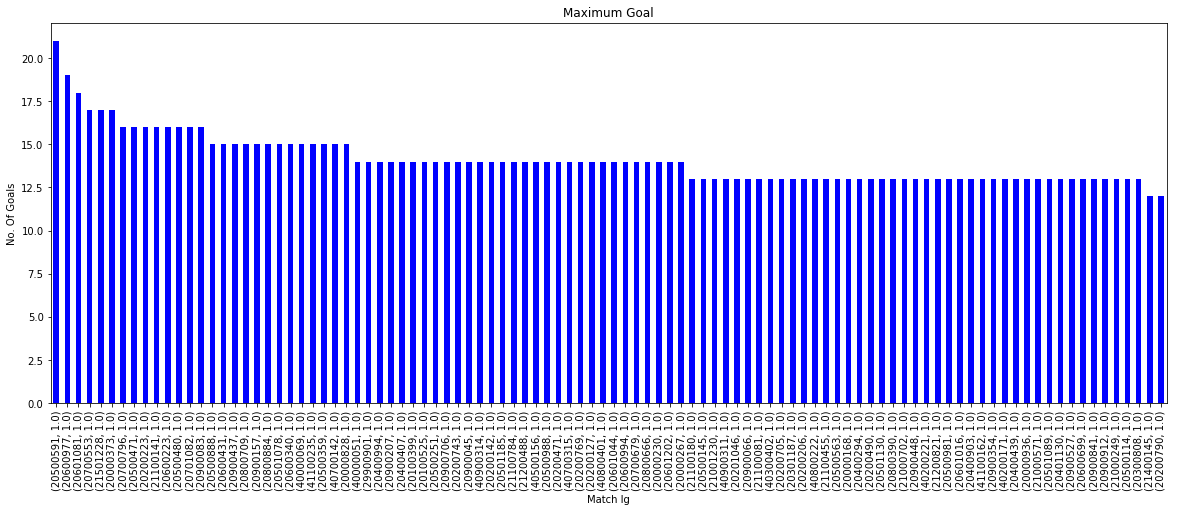

In [149]:
df[df['is_goal']==1].groupby('match_id')['is_goal'].value_counts().sort_values(ascending=False).head(100).plot.bar(color = 'Blue', figsize = (20, 7))
plt.title('Maximum Goal')
plt.xlabel('Match Id')
plt.ylabel('No. Of Goals')
plt.show()

## Macimum Goal In A Match Is 21 In A Match Whose Id Is 20500591

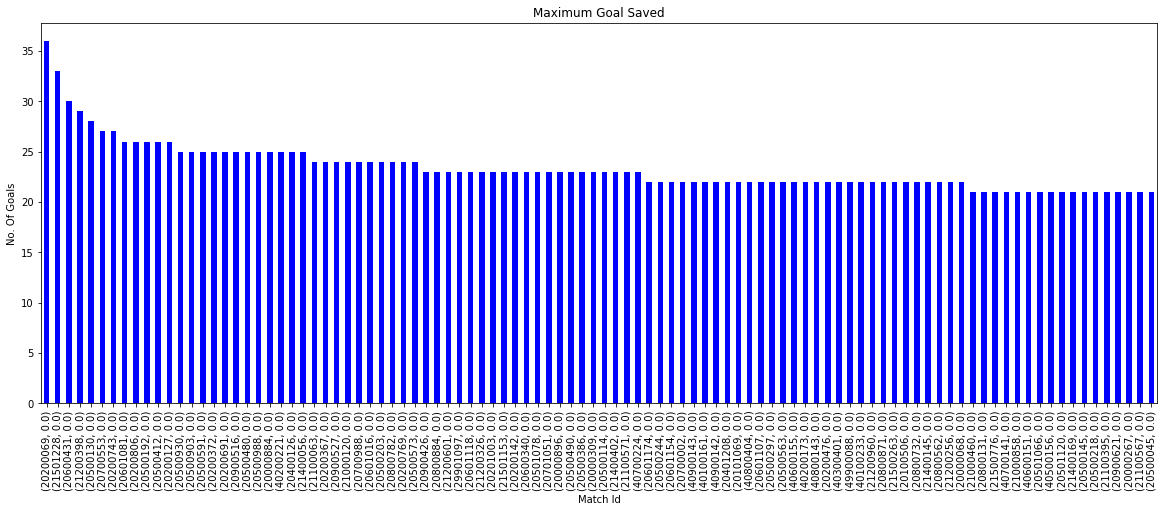

In [158]:
df[df['is_goal']==0].groupby('match_id')['is_goal'].value_counts().sort_values(ascending=False).head(100).plot.bar(color = 'Blue', figsize = (20, 7))
plt.title('Maximum Goal Saved')
plt.xlabel('Match Id')
plt.ylabel('No. Of Goals')
plt.show()

## Macimum Goal Saved In A Match Is 36 In A Match Whose Id Is 20200069 

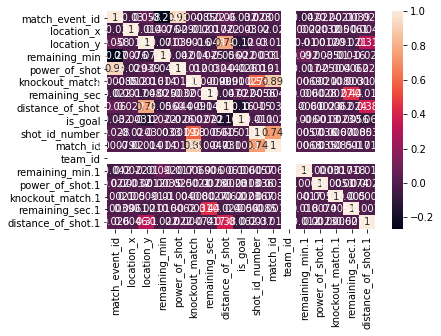

In [192]:
sns.heatmap(df.corr(),annot=True)